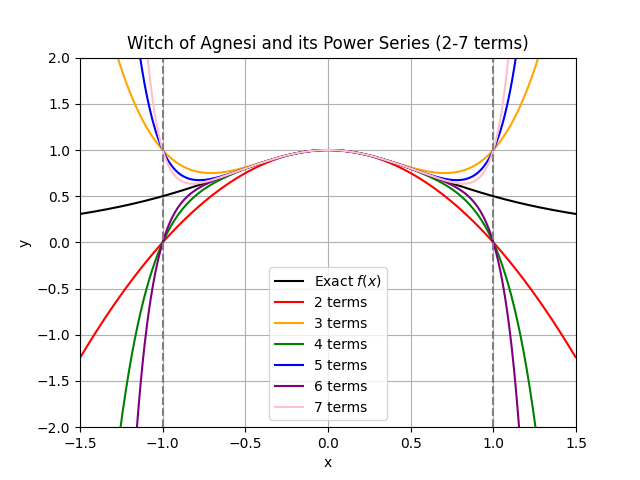

In [1]:
"""agnesi_witch.ipynb"""
# Cell 1: Plot Agnesi's witch and its power series (n = 2-7)

# Imports
from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def plot(ax: Axes) -> None:
    """Plot Agnesi's witch function and 6 of its power series (2-7 terms)"""

    # Create domain for the graph in interval (-1.5, 1.5)
    x: NDArray[np.float_] = np.linspace(-1.5, 1.5, 1000)[1:-1]
    # Store y values for simplified Witch of Agnesi function (a = 1/2)
    fx: NDArray[np.float_] = 1 / (x**2 + 1)

    # Plot the exact witch function
    ax.plot(x, fx, color="black", label=r"Exact $f(x)$")

    # Store values of power series for each domain value
    p2: NDArray[np.float_] = 1 - x**2
    p3: NDArray[np.float_] = p2 + x**4
    p4: NDArray[np.float_] = p3 - x**6
    p5: NDArray[np.float_] = p4 + x**8
    p6: NDArray[np.float_] = p5 - x**10
    p7: NDArray[np.float_] = p6 + x**12

    # Plot each power series in a different color with corresponding label
    ax.plot(x, p2, color="red", label="2 terms")
    ax.plot(x, p3, color="orange", label="3 terms")
    ax.plot(x, p4, color="green", label="4 terms")
    ax.plot(x, p5, color="blue", label="5 terms")
    ax.plot(x, p6, color="purple", label="6 terms")
    ax.plot(x, p7, color="pink", label="7 terms")

    ax.grid()

    # Set titles and labels for graph
    ax.legend()
    ax.set_title("Witch of Agnesi and its Power Series (2-7 terms)")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # Set x and y limits of graph, add vertical lines at x = +/- 1
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-2, 2)
    ax.axvline(-1, color="gray", linestyle="dashed")
    ax.axvline(1, color="gray", linestyle="dashed")
            


def main() -> None:
    plt.close("all")
    plt.figure(" ")
    plot(plt.axes())
    plt.show()


main()

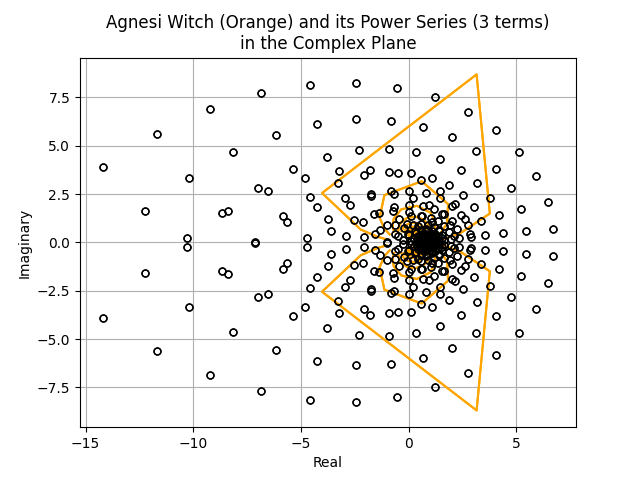

In [2]:
# Cell 2: Try plotting Witch of Agnesi and its 3-term power series on the complex plane.
# Use complex domain |Re(z)|<1.5, |Im(z)|<1.5

def plot(ax: Axes, zoom: bool) -> None:
    """Plot Witch of Agnesi and 3-term power series on complex plane"""

    # Establish real and complex domain with open endpoints
    r_domain: NDArray[np.float_] = np.linspace(-1.5, 1.5, 30)[1:-1]
    j_domain: NDArray[np.float_] = np.linspace(-1.5, 1.5, 30)[1:-1]

    # Combine real and complex domain to create domain of complex numbers (z)
    r_domain, j_domain = np.meshgrid(r_domain, j_domain)
    z: NDArray[np.complex_] = (r_domain + j_domain * 1j)

    # Calculate Witch of Agnesi function values using z
    fz: NDArray[np.complex_] = 1 / (z**2 + 1)

    # Plot Witch of Agnesi on the complex plane
    ax.plot(np.real(fz), np.imag(fz), color="orange")

    # Calculate 3-term power series values
    p3: NDArray[np.complex_] = 1 - z**2 + z**4

    # Plot 3-term power series on the complex plane as open circles
    ax.plot(np.real(p3), np.imag(p3), color="None", marker="o", mec="black", mfc="None", ms=5)

    # Titles and labels
    ax.set_title("Agnesi Witch (Orange) and its Power Series (3 terms)\nin the Complex Plane")
    ax.set_xlabel("Real")
    ax.set_ylabel("Imaginary")

    ax.grid()

    # Zoom into where the power series provides a good estimate for the witch function
    if zoom:
        ax.set_xlim(0.5, 1.5)
        ax.set_ylim(-0.5, 0.5)
    

def main(zoom: bool = False) -> None:
    plt.close("all")
    plt.figure(" ")
    plot(plt.axes(), zoom)
    plt.show()


main()

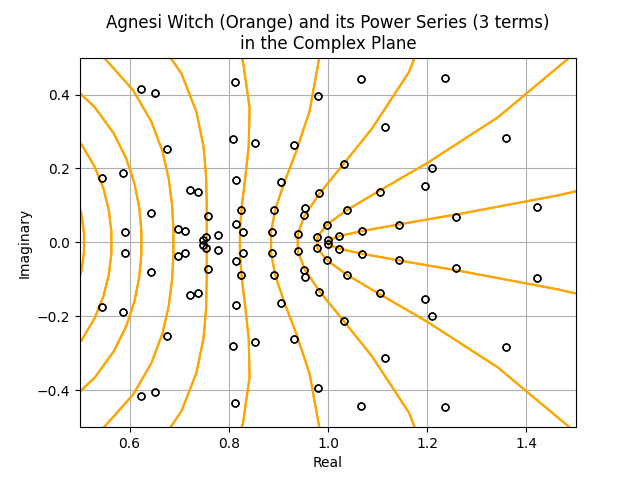

In [3]:
# Cell 3: Zoom in on region of previous graph where there is agreement between witch function and 3-term power series

"""
The power series still gives a fairly accurate approximation for a portion of the witch function when using complex numbers. 
It seems the power series is the most accurate in the region where Re(f(z)) is in the interval [0.5, 1.5] and Im(f(z)) is 
in the interval [-0.5, 0.5] as displayed in the following graph.
"""

main(zoom = True)

In [ ]:
# Cell 5: Written Answers to Posed Questions, Task 12-01

"""
The Agnesi witch function (a = 1/2) is undefined for x = -i and x = i because it results in a divide by zero error.
However, when the witch function is plotted in the complex plane, its 3-term power series still provides an estimate 
of its value, though only for a very small portion of the graph. More investigation would be needed to determine 
the domain values where the complex power series diverges from the complex witch function, how the number of terms
in the power series affects its accuracy in the complex domain, and how Runge's Phenomenon translates to the complex 
domain.

In the real domain, the power series for the Agnesi witch function diverges near x = +/- 1 because the interval of
convergence for the power series is (-1, 1). The interval of convergence can be derived from the common power series 
for 1/(1-x) which also has an interval of convergence of (-1, 1). By substituting (-x^2) for x in the power series for 
1/(1-x), we obtain the power series for the Witch of Agnesi (a = 1/2). The interval of convergence does not change when 
a value is substituted into the series for 1/(1-x), so the power series for the Witch of Agnesi converges in the interval
(-1, 1). This means the power series will only converge to the witch function values when x is in the interval (-1, 1), 
which explains the divergence of the power series at the ends of the graph created in Cell 1.

The divergence near x = -1, 1 is an example of Runge's Phenomenon. The Runge function, f(x)=1/(1+25x^2), is a variation 
of the Witch of Agnesi. As more terms are added to the Runge function's power series, the graph of the power series 
oscillates and diverges more and more from the true graph near x = +/- 1. This behavior is similar to that observed for 
the witch function in Cell 1 and largely results from the use of interpolation (curve fitting to produce the power 
series) at equidistant sample points. While every function can be represented as a series, this representation is not 
always found using standard interpolation. In order to accurately represent the Witch of Agnesi as a series, a different 
method would have to be used, such as the Chebyshev method.

Resources: 
https://www.youtube.com/watch?v=Hh1VIxc9ZgM
https://en.wikipedia.org/wiki/Runge's_phenomenon
http://www.tlu.ee/~tonu/Arvmeet/Runge%27s%20phenomenon.pdf
"""